## 1. Bitcoin e criptomoedas: conjunto de dados completo, filtragem e reprodutibilidade
<p>Desde o <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">lançamento do Bitcoin em 2008,</a>, surgiram centenas de projetos semelhantes baseados na tecnologia blockchain. Chamamos isso de criptomoedas (ou criptos na gíria da Internet). Algumas são extremamente valiosas hoje em dia e outras podem ter o potencial de se tornar extremamente valiosas no futuro. De fato, em 6 de dezembro de 2017, o Bitcoin tinha uma <a href="https://en.wikipedia.org/wiki/Market_capitalization">capitalização de mercado</a> acima de US$ 200 bilhões. E no periodo em que escrevo a capitalização de mercado mais que dobrou, o que reflete  a grande força deste mercado.</p>

<center>
<img src="https://drive.google.com/uc?id=18QUDe0Uzo4f2oGTyj79xxJhvhtq1My5l" style="width:800px"> <br> 
<em>O aumento surpreendente da capitalização de mercado do Bitcoin em 2017.</em></center>

<p>*<strong>AVISO</strong>: O mercado de criptomoedas é excepcionalmente volátil e qualquer dinheiro investido pode desaparecer no rapidamente. As criptomoedas mencionadas aqui <strong>podem ser fraudes</strong> semelhantes a <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> ou têm muitos outros problemas (supervalorização, , etc). <strong>Não confunda isso com conselhos de investimento</strong>. *</p>
<p>Dito isso, vamos ao que interessa. Começaremos com um arquivo CSV que reflete os <strong>dados no periodo de 6 de dezembro de 2017</strong>, baixado usando a API coinmarketcap (NOTA: a API pública tornou-se privada em 2020 e não está mais disponível) chamada <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [2]:
# Importando o Pandas
import pandas as pd

# Importando matplotlib e definindo a estética para plotagem posterior
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Lendo datasets/coinmarketcap_06122017.csv em pandas
dec6 = pd.read_csv('/content/coinmarketcap_06122017.csv')

# Verificando as cinco primeiras linhas
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [3]:
# Selecionando as colunas 'id' e 'market_cap_usd'
market_cap_raw = dec6[['id','market_cap_usd']]

# Contando o número de valores
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

## 2. Descartando as criptomoedas sem capitalização de mercado
<p>Por que <code>count()</code> para <code>id</code> e <code>market_cap_usd</code> diferem acima? É porque algumas criptomoedas listadas em coinmarketcap.com não têm capitalização de mercado conhecida, isso é representado por <code>NaN</code> nos dados e <code>NaN</code>s não são contados por <code>count ()</code>. Essas criptomoedas são de pouco interesse para nós nesta análise, portanto, é seguro removê-las.</p>

In [5]:
# Filtrando linhas sem uma capitalização de mercado
cap = market_cap_raw.query('market_cap_usd > 0')

# Contando o número de valores novamente
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

## 3. Qual é o tamanho do capital de mercado do Bitcoin em comparação com o resto das criptomoedas?
<p>Em dezembro de 2017, o Bitcoin era a criptomoeda dominante na capitalização de mercado (ainda permace dominante no periodo em que escrevo). Vamos plotar a capitalização de mercado das 10 principais moedas como um barplot para visualizar melhor isso.</p>

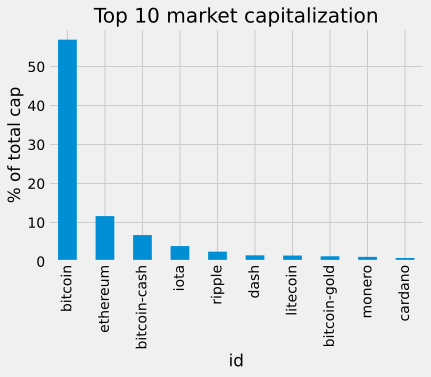

In [6]:
# Declarando-os agora para uso posterior
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecionando as primeiras 10 linhas e definindo o índice
cap10 = cap[:10].set_index('id')

# Calculando market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)

# Plotando o barplot com o título definido acima
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)

# Anotando o eixo y com o rótulo definido acima
ax.set_ylabel(TOP_CAP_YLABEL);

## 4. Tornando o gráfico mais fácil de ler e mais informativo
<p>Embora o gráfico acima seja informativo o suficiente, ele pode ser melhorado. Bitcoin é muito grande e as outras moedas são difíceis de distinguir por causa disso. Em vez da porcentagem, vamos usar uma escala log<sup>10</sup> da capitalização "bruta". Além disso, vamos usar cores para agrupar moedas semelhantes e tornar o gráfico mais informativo<sup>1</sup>. </p>
<p>Para a lógica das cores: bitcoin-cash e bitcoin-gold são bifurcações do bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum e Cardano oferecem Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">contratos inteligentes</a>. Iota e Ripple não são mineráveis. Dash, Litecoin e Monero ganham sua própria cor.</p>
<p><sup>1</sup> <em>Esta coloração é uma simplificação. Existem mais diferenças e semelhanças que não estão sendo representadas aqui.</em></p>
<p><sup>2</sup> <em>Os forks do bitcoin são na verdade <strong>muito</strong> diferentes, mas está fora do escopo falar sobre eles aqui. Por favor, veja o aviso acima e faça sua própria pesquisa.</em></p>

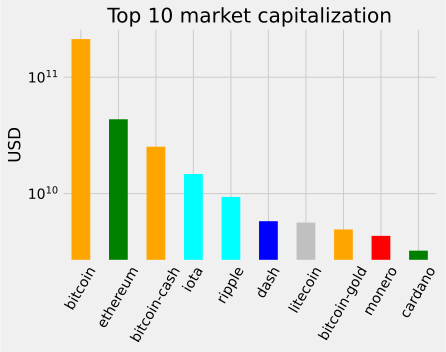

In [15]:
# Cores para o gráfico de barras
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotando market_cap_usd como antes, mas adicionando as cores, dimensionando o eixo y e rotacionando o texto do eixo x em 60º
ax = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE, logy=True, color = COLORS, rot = 60)

# Anotando o eixo y com log(USD)
ax.set_ylabel('USD')

# Removendo o xlabel, pois não é muito informativo
ax.set_xlabel('');

## 5. O que está acontecendo?! Volatilidade em criptomoedas
<p>O mercado de criptomoedas tem estado espetacularmente volátil desde a abertura da primeira bolsa. Este caderno não começou com um grande e ousado aviso à toa. Vamos explorar um pouco mais essa volatilidade! Começaremos selecionando e plotando a variação percentual de 24 horas e 7 dias, que já temos disponível.</p>

In [8]:
# Selecionando as colunas id, percent_change_24h e percent_change_7d
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Definindo o índice como 'id' e descartando todas as linhas NaN
volatility = volatility.set_index('id').dropna()

# Classificando o DataFrame por percent_change_24h em ordem crescente
volatility = volatility.sort_values('percent_change_24h')

# Verificando as primeiras linhas
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## 6. Bem, já podemos ver que as coisas podem ser *um pouco* loucas
<p>Parece que você pode perder muito dinheiro rapidamente com criptomoedas. Vamos plotar os 10 maiores ganhadores e os 10 maiores perdedores em capitalização de mercado.</p>

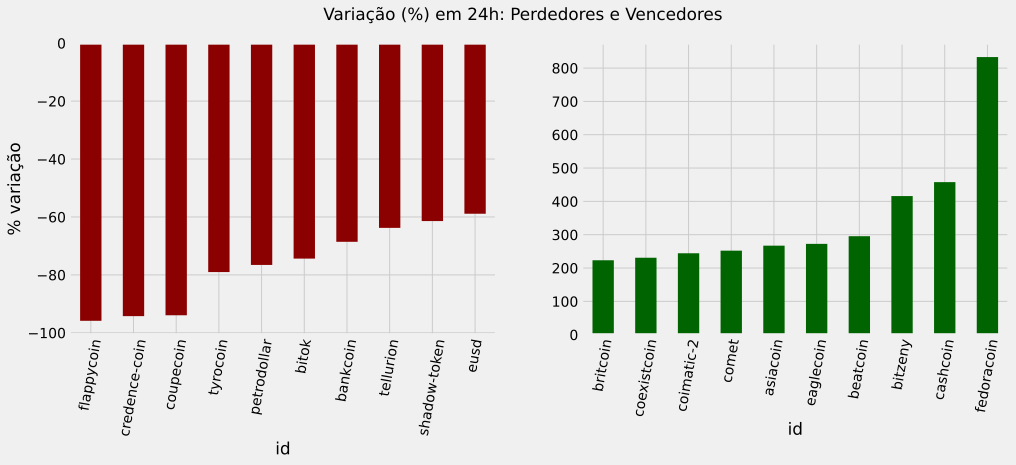

In [32]:
# Definindo uma função com 2 parâmetros, a série a plotar e o título

def top10_subplot(volatility_series, title):
    # fazendo a subplot e a figura para nrows e ncolunas
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    # Traçando com pandas o barchart para os 10 maiores perdedores com a cor VERMELHA
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0], rot =80)
    # Definindo o título principal como TITLE
    fig.suptitle(title)
    # Configurando o ylabel para "% variação"
    ax.set_ylabel('% variação')

# Igual ao anterior, mas para os 10 primeiros vencedores e em verde escuro

    ax = volatility_series[-10:].plot.bar(color="darkgreen", ax=axes[1], rot = 80)
    # Retornando isso para uma boa prática, pode ser usado mais tarde
    return fig, ax

DTITLE = "Variação (%) em 24h: Perdedores e Vencedores"

# Chamando a função acima com a série volatility.percent_change_24h
# e título DTITLE 
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

## 7. Ok, esses são... interessantes. Vamos verificar a série semanal também.
<p>Aumento diário de 800%?!<sup>1</sup></p>
<p>Depois de nos acalmar, vamos reutilizar a função definida acima para ver o que está acontecendo semanalmente em vez de diariamente.</p>
<p><em><sup>1</sup> Reserve um momento para entender as implicações dos gráficos vermelhos sobre quanto valor algumas criptomoedas perdem em períodos tão curtos de tempo</em></p>

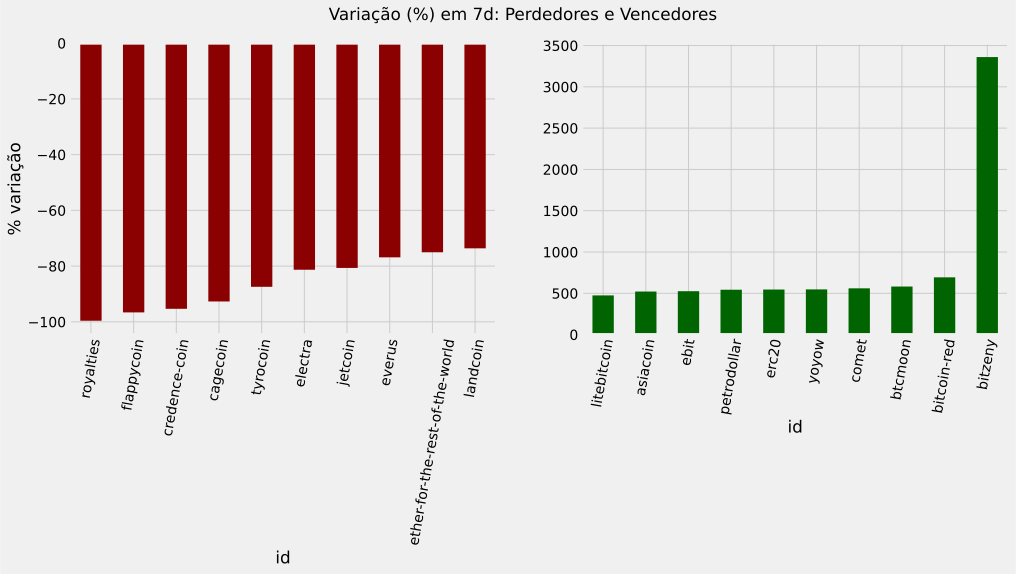

In [34]:
# Classificando percent_change_7d em ordem crescente
volatility7d = volatility.sort_values("percent_change_7d")

WTITLE = "Variação (%) em 7d: Perdedores e Vencedores"

# Chamando a função top10_subplot
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE);

## 8. Quão pequeno é pequeno?
<p>Os nomes das criptomoedas acima são bastante desconhecidos e há uma flutuação considerável entre as mudanças percentuais de 1 e 7 dias. Tal como acontece com as ações e muitos outros produtos financeiros, quanto menor a capitalização, maior o risco e a recompensa. Criptomoedas menores são projetos menos estáveis ​​em geral e, portanto, investimentos ainda mais arriscados do que os maiores<sup>1</sup>. Vamos classificar nosso conjunto de dados com base nas <a href="https://www.investopedia.com/video/play/large-cap/">definições</a> de capitalização da Investopedia para ações da empresa. </p>
<p><sup>1</sup> <em>Criptomoedas são uma nova classe de ativos, portanto não são diretamente comparáveis ​​a ações. Além disso, não há limites imutáveis ​​para o que é um estoque "pequeno" ou "grande". Finalmente, alguns investidores argumentam que o bitcoin é semelhante ao ouro, o que os tornaria mais comparáveis ​​a uma <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a>. .</em></p>

In [11]:
# Selecionando tudo maior que 10 bilhões
largecaps = cap.query("market_cap_usd > 1E+10")

# Imprimindo largecaps
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


## 9. A maioria das moedas são minúsculas
<p>Observe que muitas moedas não são comparáveis ​​a grandes empresas em valor de mercado, então vamos nos desviar da definição original da Investopedia mesclando categorias.</p>

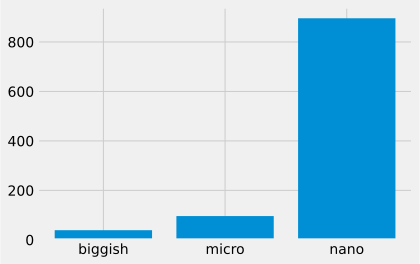

In [35]:
# Fazendo uma boa função para contar diferentes marketcaps do
# "cap" DataFrame. Retorna um int.

def capcount(query_string):
    return cap.query(query_string).count().id

# Labels para o plot
LABELS = ["biggish", "micro", "nano"]

# Usando capcount para verificar as criptos not_so_small
biggish = capcount("market_cap_usd > 3E+8")

# O mesmo que acima para micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... e para nano
nano =  capcount("market_cap_usd < 5E+7")

# Fazendo uma lista com as 3 contagens
values = [biggish, micro, nano]

# Plotando-os com matplotlib
plt.bar(range(len(values)), values, tick_label=LABELS);